# Regression Analysis

## Linear Regression

**선형회귀모델**

$\hat{y}= \sum_{i=1}^n \theta_i x_i = \vec{\theta^T}\cdot\vec{x}$

- $\hat{y}$ = 예측값
- $\theta_0$ = 편항(bias)
- $x_i$ = 특성값
- $\theta_i$ = 특성 가중치(weight)

여기서 $x_0$ = 1 (bias 부분이므로)

**선형회귀모델에서의 MSE 비용함수**

MSE$(X,h_\theta) = \frac 1 m \sum_{i=1}^m  (\theta^T x^{(i)} - y^{(i)})^2$

**비용함수를 최소화하는 $\theta$ 찾는 정규방정식**

$\hat{\theta} = (X^T X)^{-1} X^T y$

### 선형회귀 가중치, 편향 계산

In [44]:
import numpy as np

noise = np.random.rand(100,1)
x = 2*np.random.rand(100,1)
y = 3*x + 4 + noise 

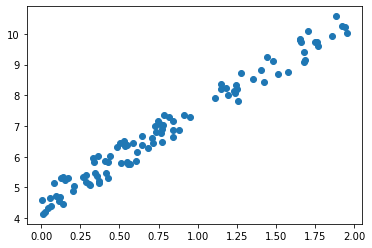

In [45]:
import matplotlib.pyplot as plt

plt.scatter(x,y)
plt.show()

$ y = \theta_1 x_1 + \theta_0 x_0 $ 

$ x_0 = 1 $ 추가해줘야 한다.

In [46]:
add_x = np.c_[np.ones((100,1)),x]

In [47]:
# 정규방정식 대입
theta = np.linalg.inv(add_x.T.dot(add_x)).dot(add_x.T).dot(y)
theta

array([[4.47865066],
       [3.02103795]])

In [48]:
len(x),len(y)

(100, 100)

In [49]:
# 사이킷런에서 구하기
from sklearn.linear_model import LinearRegression 
lin_reg = LinearRegression()
lin_reg.fit(x,y)

lin_reg.intercept_, lin_reg.coef_

(array([4.47865066]), array([[3.02103795]]))

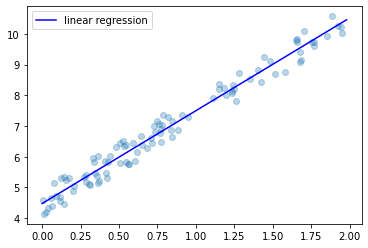

In [50]:
a = np.linspace(0,2,100,endpoint=False)
b = theta[1]*a +theta[0]

plt.scatter(x,y,alpha=0.3)
plt.plot(a,b,"b",label="linear regression")

plt.legend()
plt.show()

## 다항 회귀

In [51]:
noise = np.random.randn(100,1)
X = 6*np.random.rand(100,1)-3 
y = 0.5*X**2 + X + 2 + noise

In [52]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2, include_bias=False)
X_Poly = poly.fit_transform(X)

lin_reg = LinearRegression()
lin_reg.fit(X_Poly, y)
theta = lin_reg.coef_
theta_0 = lin_reg.intercept_
lin_reg.intercept_,lin_reg.coef_ 

(array([2.14109057]), array([[1.02576077, 0.46065499]]))

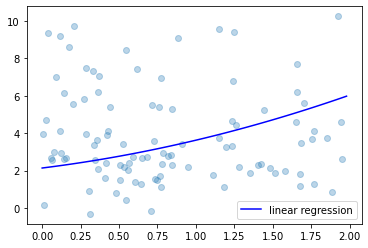

In [53]:
a = np.linspace(0,2,100,endpoint=False)
b = theta[0][1]*a**2 +theta[0][0]*a+theta_0

plt.scatter(x,y,alpha=0.3)
plt.plot(a,b,"b",label="linear regression")

plt.legend()
plt.show()

## 로지스틱 회귀

In [54]:
from sklearn.linear_model import LogisticRegression

In [55]:
a= 3* np.random.randn(2,2)
a

array([[-0.2335992 , -0.8630248 ],
       [ 2.28864262, -3.95586144]])

In [56]:
b = np.zeros((2,100,2))
for i in range(2):
    for j in range(100):
        b[i,j,0] = a[i,0] + np.random.randn()
        b[i,j,1] = a[i,1] + np.random.randn()

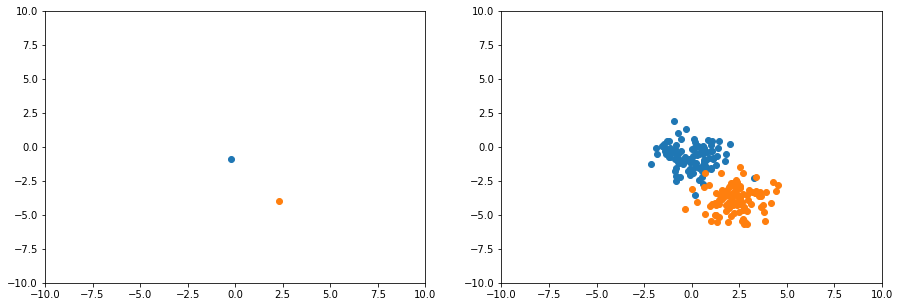

In [57]:
plt.figure(figsize=(15,5))
plt.subplot(121)
for i in range(2):
    plt.scatter(a[i,0],a[i,1])
    
plt.xlim(-10,10)
plt.ylim(-10,10)
    
plt.subplot(122)
for i in range(2):
    plt.scatter(b[i,:,0],b[i,:,1])

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [58]:
x_train= b.reshape(200,2)
x_train.shape

(200, 2)

In [59]:
y_train=[]
for i in range(100):
    y_train.append(0)
for i in range(100):
    y_train.append(1)
y_train

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1]

In [60]:
log_reg=LogisticRegression()
log_reg.fit(x_train,y_train)

LogisticRegression()

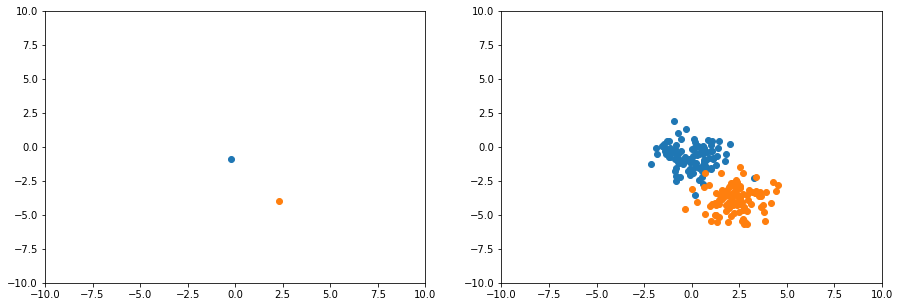

In [61]:
plt.figure(figsize=(15,5))
plt.subplot(121)

#파란색이 0, 주황색이 1
for i in range(2):
    plt.scatter(a[i,0],a[i,1])
    
plt.xlim(-10,10)
plt.ylim(-10,10)
    
plt.subplot(122)
for i in range(2):
    plt.scatter(b[i,:,0],b[i,:,1])

plt.xlim(-10,10)
plt.ylim(-10,10)
plt.show()

In [63]:
log_reg.predict([[-2.5,0]])

array([0])